# Optimizing delivery with Reinforcement Learning


In [4]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook
import sys
sys.path.append("../")
from delivery import *
from delivery import run_episode,DeliveryQAgent,run_n_episodes
from Env import DeliveryEnvironment 

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Environment definition
As for any RL problem, an environment must be designed where the Agent will evolve.<br>
For convenience and readability, we will define it like OpenAI Gym environments

Initialized Delivery Environment with 10 random stops
Target metric for optimization is distance


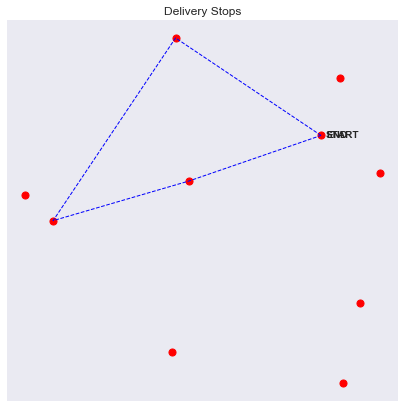

In [5]:
env = DeliveryEnvironment(n_stops = 10)

for i in [0,1,2,3]:
    env.step(i)
env.render()

# Q Learning
## Simple case

Initialized Delivery Environment with 50 random stops
Target metric for optimization is distance

done


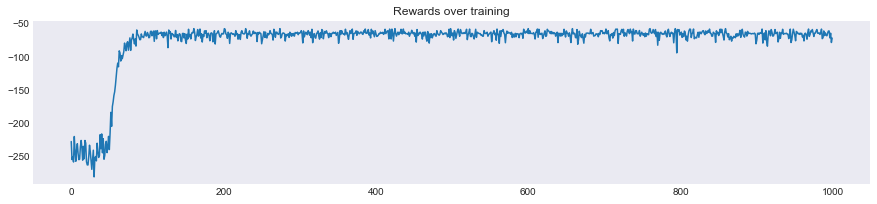

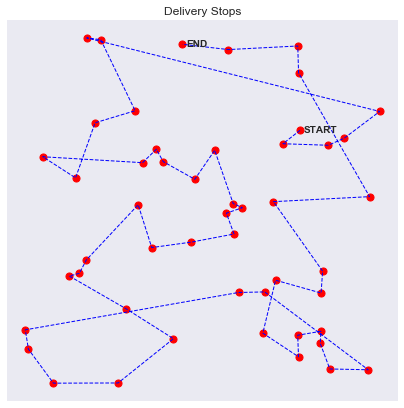

In [6]:
env = DeliveryEnvironment(n_stops = 50,method = "distance")
agent = DeliveryQAgent(env.observation_space,env.action_space)

run_n_episodes(env,agent,"training_50_stops.gif")
env.render()
print('done')

## Traffic case

Initialized Delivery Environment with 100 random stops
Target metric for optimization is traffic_box

done


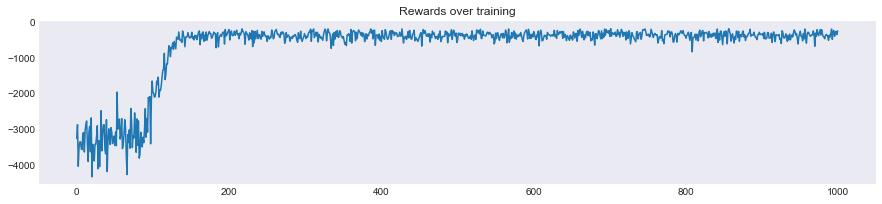

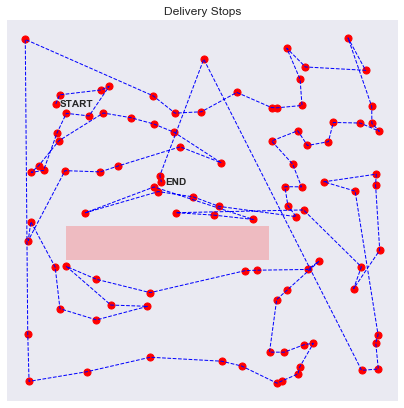

In [7]:
env = DeliveryEnvironment(n_stops = 100,method = "traffic_box",box_size = 0.6,traffic_intensity = 100)
agent = DeliveryQAgent(env.observation_space,env.action_space)
run_n_episodes(env,agent,"training_100_stops_traffic.gif")
env.render()
print('done')

In [ ]:
env = DeliveryEnvironment(n_stops = 100,method = "time_window")
agent = DeliveryQAgent(env.observation_space,env.action_space)
run_n_episodes(env,agent,"training_100_stops_traffic.gif")
env.render()
print('done')


In [10]:
import numpy as np
l=[1,0,0,1,1,0,0,0]
a = np.empty((8, 8))
a

array([[2.38578506e-313, 2.38578715e-313, 2.38578715e-313,
        5.43472210e-323, 0.00000000e+000, 3.95252517e-323,
        0.00000000e+000, 2.12200717e-314],
       [0.00000000e+000, 0.00000000e+000, 4.24400423e-314,
        0.00000000e+000, 9.88131292e-324, 1.26480805e-319,
        0.00000000e+000, 0.00000000e+000],
       [1.26480805e-319, 0.00000000e+000, 0.00000000e+000,
        4.24400423e-314, 0.00000000e+000, 0.00000000e+000,
        4.24400423e-314, 0.00000000e+000],
       [0.00000000e+000, 1.26480805e-319, 0.00000000e+000,
        0.00000000e+000, 1.26480805e-319, 0.00000000e+000,
        0.00000000e+000, 1.26480805e-319],
       [0.00000000e+000, 0.00000000e+000, 1.69759794e-313,
        0.00000000e+000, 0.00000000e+000, 4.24400297e-314,
        0.00000000e+000, 0.00000000e+000],
       [2.12200857e-314, 0.00000000e+000, 1.48219694e-323,
        6.36600078e-314, 0.00000000e+000, 0.00000000e+000,
        6.36600002e-314, 0.00000000e+000],
       [0.00000000e+000, 6.3660000

In [13]:
for i in range(8):
    for j in range(8):
        if l[i]==l[j]:
            a[i][j] = 1
        elif l[i] > l[j]:
            a[i][j] = 100
        else:
            a[i][j] = 10000000
        
a

array([[1.e+00, 1.e+02, 1.e+02, 1.e+00, 1.e+00, 1.e+02, 1.e+02, 1.e+02],
       [1.e+07, 1.e+00, 1.e+00, 1.e+07, 1.e+07, 1.e+00, 1.e+00, 1.e+00],
       [1.e+07, 1.e+00, 1.e+00, 1.e+07, 1.e+07, 1.e+00, 1.e+00, 1.e+00],
       [1.e+00, 1.e+02, 1.e+02, 1.e+00, 1.e+00, 1.e+02, 1.e+02, 1.e+02],
       [1.e+00, 1.e+02, 1.e+02, 1.e+00, 1.e+00, 1.e+02, 1.e+02, 1.e+02],
       [1.e+07, 1.e+00, 1.e+00, 1.e+07, 1.e+07, 1.e+00, 1.e+00, 1.e+00],
       [1.e+07, 1.e+00, 1.e+00, 1.e+07, 1.e+07, 1.e+00, 1.e+00, 1.e+00],
       [1.e+07, 1.e+00, 1.e+00, 1.e+07, 1.e+07, 1.e+00, 1.e+00, 1.e+00]])

[autoreload of Env failed: Traceback (most recent call last):
  File "/Users/eli/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/eli/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/eli/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/eli/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/eli/Documents/GitHub/reinforceme

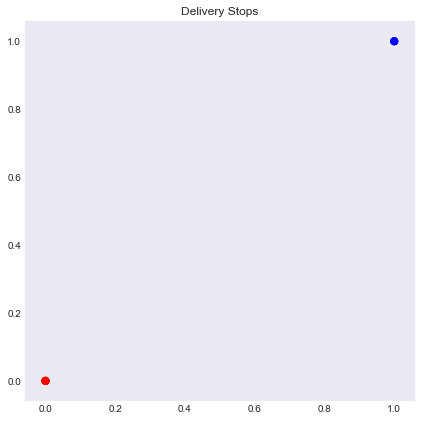

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_title("Delivery Stops")
color = []
for i in range(8):
    if l[i] == 0:
        color.append('red')
    else:
        color.append('blue')
# Show stops
ax.scatter(l, l, c=color, s=50)